<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

## Ingeniería Financiera
# PAP | Sistemas de Trading

---

 # Inversión del Capital en Portafolios ESG vs. Benchmark (NAFTRAC)

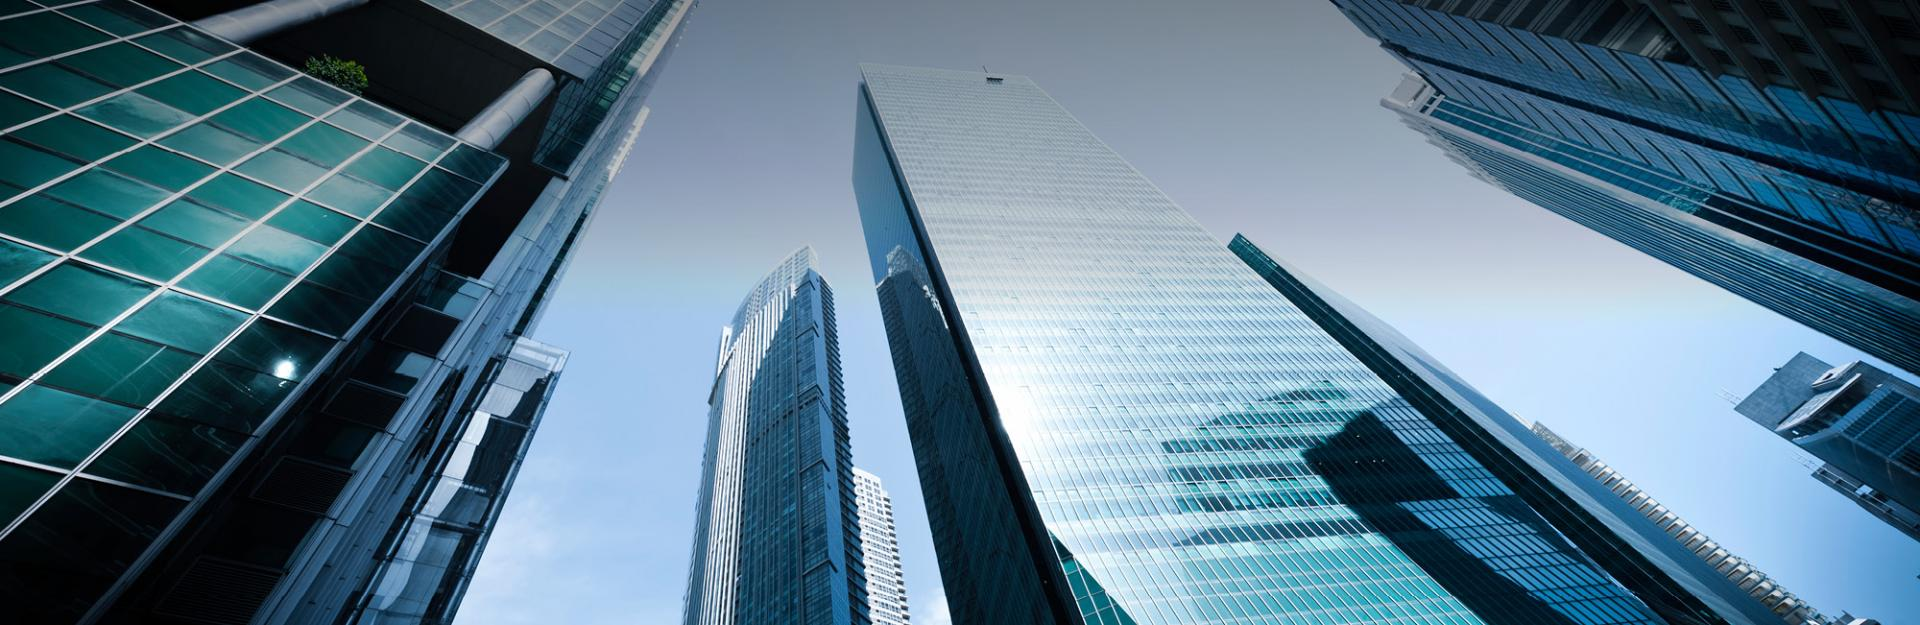

#  Abstract 

En una época en la que el cambio climático y la justicia social dominan cada vez más los titulares, las políticas *ambientales, sociales y de gobierno corporativo (ESG o ASG)*, son factores que ya no se tratan como cuestiones triviales en una empresa. Por el contrario, se están convirtiendo en aspectos más fundamentales para su desempeño financiero y reputación.

En los mercados financieros, ha habido un aumento en la demanda por parte de los inversores por datos **ESG**. *¿Por qué el aumento?* Un creciente cuerpo de investigación sugiere un vínculo positivo entre el desempeño **ESG**, desempeño financiero y valor de una empresa. 

Te invitamos a conocer cuales son los aspectos fundamentales que cualquier empresa o  inversionista debería considerar a la hora de invertir en proyectos ESG, especialmente en México, ya que a partir del 2022 las *Administradoras de Fondos para el Retiro (AFORES)* tendrán que incorporar en sus portafolios proyectos y/o empresas que cumplan dichos criterios.

*****

# 0.0 Librerías y Dependencias

****

#  0.1 Librerías

Para correr este notebook es necesario tener instaladas y/o en el archivo _requirements.txt_ las siguientes librerías :

- pandas>=1.1.0
- numpy>=1.19.1
- jupyter>=1.0.0
- scipy>=1.6.0
- matplotlib>=3.3.4
- pandas-datareader>=0.9.0
- sklearn>=0.23.2
- jupyter>=1.0.0
- yfinance>=0.1.54

#  0.2 Dependencias 

Para correr este notebook es necesario contar con los siguientes archivos y dependencias externas:

- **/NAFTRAC/NAFTRAC_holdings**
- **/ESG_MSCI/ESGMEX_holdings**
- **requirements.txt**

******

# 1.0 Datos

********

Dentro de la carpeta **/files** se encuentran todos los archivos en formato *.csv* con los activos utilizados mes con mes y sus respectivas ponderaciones durante el periodo de observación. 

La información es importante para saber que peso darle a cada emisora a la hora de iniciar la inversión del capital. Por lo que se crearon diferentes funciones para leer de manera recursivas los datos, extraer fechas y englobar todo en un solo *DataFrame* que nos permitirá comenzar con el análisis. 

La estructura de proyecto se basa en crear diferentes archivos de *python* los cuales mandamos llamar al inicio en una sola línea. Cada función tiene un objetivo distinto, consecutivo y complementario para la creación del análisis. Esto nos permite obtener como resultado una organización más limpia, funcional y eficiente, lo que se traduce en una mejor comprensión para el lector.

Los elementos son los siguientes:

- **main.py**
        Contiene el orden secuencial de las funciones principales para correr el análisis. 
- **functions.py**
        Contiene todas las funciones referentes al cálculo de ambas estrategias.
- **data.py**
        Contiene todas las funciones referentes a la descarga y manejo de datos.
- **visualizations.py**
        Contiene todas las funciones correspondientes a la creación de gráficas y/o elementos visuales. 

In [1]:
# Importar liberías                                                                                                                                                                                                                                                                                                                                                 
import functions as fn
import data as dt
import visualizations as vz
import portfolio as pf
import industries as ind
import pandas as pd
import warnings
from scipy.optimize import minimize
warnings.filterwarnings('ignore')

In [2]:
# Extracción de fechas de los archivos
dates_ESG = fn.dates_for_files(path=r'ESG_MSCI', file_name="ESGMEX_holdings_")
dates_NAFTRAC = fn.dates_for_files(path=r'NAFTRAC', file_name="NAFTRAC_")

# Lectura recursiva 
df_ESG = dt.multiple_csv(path=r'ESG_MSCI', file_name="ESGMEX_holdings_")
df_NAFTRAC = dt.multiple_csv(path=r'NAFTRAC', file_name="NAFTRAC_")

# Limpieza de tickers utilizados como CASH y adición del componente ".MX" para la descarga de precios.
historical_ESG = fn.cleaning_data(df_ESG)
historical_NAFTRAC = fn.cleaning_data(df_NAFTRAC)

Para poder observar la evolución del capital a lo largo del tiempo requeriemos descargar los precios históricos del periodo de observación para cada uno de los activos presentes en los archivos. Se utilizó la liberia de **yfinance** para obtener los precios de apertura y cierre diarios. 

In [3]:
# Lista de tickers únicos presentes en el histórico
tickers_ESG = fn.global_tickers(historical_ESG)
tickers_NAFTRAC = fn.global_tickers(historical_NAFTRAC)

# Descarga de precios de apertura y cierre de las fechas de interés con frecuencia diaria.
open_ESG = dt.get_open(tickers_ESG, '2020-07-31', '2021-04-16', freq="d")
closes_ESG = dt.get_closes(tickers_ESG,  '2020-07-31', '2021-04-16', freq="d")

open_NAFTRAC = dt.get_open(tickers_NAFTRAC,  '2020-07-31', '2021-04-17', freq="d")
closes_NAFTRAC = dt.get_closes(tickers_NAFTRAC,  '2020-07-31', '2021-04-17', freq="d")

Finalmente, podemos englobar dichos precios, pesos, fechas y activos en una sola tabla para facilitar los próximos cálculos.

In [4]:
global_df_ESG = dt.global_dataframe(historical_ESG, closes_ESG, open_ESG, dates_ESG)
global_df_NAFTRAC = dt.global_dataframe(historical_NAFTRAC, closes_NAFTRAC, open_NAFTRAC, dates_NAFTRAC)

In [5]:
global_df_ESG.head()

,Ticker,Fecha,Peso (%),Close,Open
0,AMXL.MX,2020-07-31,0.1898,13.583109,14.24
1,WALMEX.MX,2020-07-31,0.1257,51.393097,52.98
2,FEMSAUBD.MX,2020-07-31,0.1163,133.211166,136.960007
3,GFNORTEO.MX,2020-07-31,0.0964,77.813026,82.290001
4,GMEXICOB.MX,2020-07-31,0.0599,54.019516,57.169998


In [6]:
global_df_NAFTRAC.head()

,Ticker,Fecha,Peso (%),Close,Open
0,AMXL.MX,2020-07-31,0.1442,13.583109,14.24
1,WALMEX.MX,2020-07-31,0.1169,51.393097,52.98
2,FEMSAUBD.MX,2020-07-31,0.1122,133.462646,136.960007
3,GFNORTEO.MX,2020-07-31,0.0866,79.900002,82.290001
4,GMEXICOB.MX,2020-07-31,0.0793,54.019516,57.169998


# 2. Procesos

*************

## 2.1 Inicialización

La incialización de la **inversión pasiva** consta de obtener las ponderaciónes iniciales a la fecha de inicio, calculo de títulos correspondientes, comisiones y **CASH** disponible. 

Como se puede observar en la siguiente tabla, la función *passive_weights()* filtra y calcula los elementos necesarios para incializar la posición. La cual requiere de los siguientes argumentos: 

- DataFrame histórico que debe contener activos, fechas, peso y precios.
- Fechas extraidas de los archivos en los cuales se hará corte de la posción mes con mes.
- Capital
- Comision

In [7]:
passive_weights_ESG = fn.passive_weights(global_df_ESG, dates_ESG, 1000000, 0.00125)
passive_weights_NAFTRAC = fn.passive_weights(global_df_NAFTRAC, dates_NAFTRAC, 1000000, 0.00125)

In [8]:
passive_weights_ESG.head()

,Ticker,Titulos,Peso (%) fijo,Capital,Close,Comision
0,AMXL.MX,13973,0.1898,189800.0,13.583109,237.245976
1,WALMEX.MX,2445,0.1257,125700.0,51.393097,157.070152
2,FEMSAUBD.MX,873,0.1163,116300.0,133.211166,145.366685
3,GFNORTEO.MX,1238,0.0964,96400.0,77.813026,120.415658
4,GMEXICOB.MX,1108,0.0599,59900.0,54.019516,74.81703


In [9]:
passive_weights_NAFTRAC.head()

,Ticker,Titulos,Peso (%) fijo,Capital,Close,Comision
0,AMXL.MX,10616,0.1442,144200.0,13.583109,180.247855
1,WALMEX.MX,2274,0.1169,116900.0,51.393097,146.084878
2,FEMSAUBD.MX,840,0.1122,112200.0,133.462646,140.135779
3,GFNORTEO.MX,1083,0.0866,86600.0,79.900002,108.164627
4,GMEXICOB.MX,1467,0.0793,79300.0,54.019516,99.058287


## 3.0 Evolución del capital

Para la evolución del capital a lo largo del tiempo, es necesario multiplicar los títulos iniciales - sin cambios a lo largo del periodo - por el precio diario. Recordemos que en este tipo de inversión las comisiones se extrajeron una sola vez al comienzo y el **CASH** se mantuvo sin cambios. 

*El calculo del capital corresponde a la siguiente formula:*

**CAPITAL = POSTURA (1) + CASH (2)  - COMISIONES (3)**

    (1) Títulos *n-Activo* x *n-día Precio* de todos los activos iniciales 
    (2) 100% - Pesos (%).sum() = [ Cash (%) * Capital ]
    (3) Comision.sum() = Títulos *n-Activo* x *n-Precio* x $0.00125

  Finalmente agrupamos por las fechas fijas provenientes de los archivos y calculamos el rendimiento mensual Vs. Capital ($1,000,000 MXN) y rendimiento acumulado.
  
  
  * Nota: La función *passive_investment()* contenida en main.py recibe los mismos argumentos que la función de *passive_weights()*, esta ultima se manda llamar dentro para realizar los calculos restantes y previamente descritos en esta sección. 

In [10]:
passive_ESG = fn.passive_investment(global_df_ESG,dates_ESG,1000000,0.00125)
passive_NAFTRAC = fn.passive_investment(global_df_NAFTRAC,dates_NAFTRAC,1000000,0.00125)

In [11]:
passive_ESG

,Capital,Rend. (%),Rend. Acum (%)
2020-07-31,998936.93,-0.001063,-0.0011
2020-07-31,1000000.00,0.000000,-0.0011
2020-08-31,987874.48,-0.012126,-0.0132
2020-09-30,1006723.00,0.006723,-0.0065
2020-10-30,997281.33,-0.002719,-0.0092
2020-11-30,1127137.59,0.127138,0.1180
2020-12-31,1179062.25,0.179062,0.2970
2021-01-29,1145906.18,0.145906,0.4429
2021-02-26,1185931.80,0.185932,0.6289
2021-03-31,1254097.90,0.254098,0.8830


In [12]:
passive_NAFTRAC

,Capital,Rend. (%),Rend. Acum (%)
2020-07-31,997575.50,-0.002425,-0.0024
2020-07-31,1000000.00,0.000000,-0.0024
2020-08-21,1026956.24,0.026956,0.0245
2020-09-30,1012076.81,0.012077,0.0366
2020-10-30,1002140.71,0.002141,0.0387
2020-11-30,1138344.56,0.138345,0.1771
2020-12-31,1197986.14,0.197986,0.3751
2021-01-29,1168689.55,0.168690,0.5438
2021-02-26,1215390.04,0.215390,0.7592
2021-03-31,1286706.68,0.286707,1.0459


# 4.0 Portafolio de mínima varianza y maximización de Sharpe Ratio con Simulación Montecarlo

********

En cuanto a la selección de portafolios, lo que hacemos es simular una gran cantidad de posibles portafolios que se pueden construir con los activos dados (generamos muchas ponderaciones posibles), y calculamos su rendimiento esperado y volatilidad para dibujarlos, y así poder identificar objetos de interés:

- **Portafolio de mínima varianza**
- **Portafolio EMV**

In [13]:
tickers_= passive_weights_ESG["Ticker"].to_list()
closes = dt.get_closes(tickers_, '2019-07-31', '2020-07-31', freq="d")

In [14]:
capital = 1000000
comision = 0.0025
n_port = 100000
rf = 0.0407

# Pesos utilizando mínima varianza y maximización del sharpe ratio
MC_weights_minvar = pf.port_mc(closes, n_port, tickers_, rf)[0]
MC_weights_RS = pf.port_mc(closes, n_port, tickers_, rf)[1]

# Generación de alteatorios 
pesos_MC = pf.port_mc(closes, n_port, tickers_, rf)[2]
pesos_MC.head()

,$w1$,$w2$,$w3$,$w4$,$w5$,$w6$,$w7$,$w8$,$w9$,$w10$,...,$w17$,$w18$,$w19$,$w20$,$w21$,$w22$,$w23$,$E[p]$,$\sigma$,RS
0,0.000627,0.065996,0.017896,0.067599,0.014218,0.015374,0.009162,0.080327,0.078293,0.012501,...,0.089904,0.116084,0.028121,0.058982,0.094351,0.103543,0.045692,-0.000213,0.016589,-0.019663
1,0.076609,0.006968,0.003612,0.000836,0.063384,0.038286,0.066627,0.041478,0.058133,0.235624,...,0.008780,0.044804,0.001494,0.030145,0.015922,0.076176,0.031616,0.000092,0.016333,-0.001262
2,0.171180,0.020460,0.007417,0.009705,0.016826,0.011294,0.018052,0.051706,0.162378,0.048029,...,0.002290,0.087981,0.001261,0.018048,0.006306,0.000952,0.094574,0.000185,0.016163,0.004457
3,0.008042,0.027180,0.017417,0.037227,0.100931,0.001349,0.010854,0.048382,0.121570,0.015113,...,0.002248,0.075656,0.046694,0.052258,0.018872,0.006077,0.056442,0.000107,0.017804,-0.000344
4,0.034581,0.044841,0.228712,0.006868,0.052753,0.008515,0.029817,0.017229,0.010804,0.020661,...,0.024907,0.013291,0.054374,0.001560,0.046530,0.011556,0.078889,-0.000141,0.015370,-0.016516


In [15]:
# Compra de títulos y comisiones 
fix_minvar = pf.new_weights(passive_weights_ESG, MC_weights_minvar, capital, comision)
fix_RS = pf.new_weights(passive_weights_ESG, MC_weights_RS, capital, comision)

In [16]:
fix_minvar.head()

,Ticker,Close,Tickers,Peso (%) fijo,Titulos,Comision,Capital
0,AMXL.MX,13.583109,AMXL.MX,0.089601,6596,223.985466,89594.186317
1,WALMEX.MX,51.393097,WALMEX.MX,0.166534,3240,416.284085,166513.634033
2,FEMSAUBD.MX,133.211166,FEMSAUBD.MX,0.019722,148,49.288132,19715.252625
3,GFNORTEO.MX,77.813026,GFNORTEO.MX,0.024172,310,60.305095,24122.038193
4,GMEXICOB.MX,54.019516,GMEXICOB.MX,0.003365,62,8.373025,3349.209991


In [17]:
fix_RS.head()

,Ticker,Close,Tickers,Peso (%) fijo,Titulos,Comision,Capital
0,AMXL.MX,13.583109,AMXL.MX,0.005278,388,13.175616,5270.246254
1,WALMEX.MX,51.393097,WALMEX.MX,0.015490,301,38.673305,15469.322174
2,FEMSAUBD.MX,133.211166,FEMSAUBD.MX,0.009531,71,23.644982,9457.992813
3,GFNORTEO.MX,77.813026,GFNORTEO.MX,0.028888,371,72.171582,28868.632805
4,GMEXICOB.MX,54.019516,GMEXICOB.MX,0.027899,516,69.685176,27874.070251


## 4.1 Medidas de Desempeño

Antes de emitir conclusiones observemos primero las medidas de atribución de desempeño de cada estrategias mostradas a continuación:

* El rendimiento mensual, acumulado y *sharpe ratio* nos hablan mucho sobre la rentabilidad que tuvo el portafolio durante el periodo de análsis. En especial, este último cuya finalidad es describir la rentabilidad de la inversión contra la tasa libre de riesgo - **Banxico Cetes 28 días 02/05/2021**


In [18]:
passive_ESG_new_minvar = pf.passive_investment(global_df_ESG ,fix_minvar, dates_ESG, capital, comision)
passive_ESG_new_RS = pf.passive_investment(global_df_ESG ,fix_RS, dates_ESG, capital, comision)

In [19]:
fn.key_metrics(passive_NAFTRAC, passive_ESG, passive_ESG_new_minvar, passive_ESG_new_RS , 0.0407)

,Descripción,Inversion ESG,Inversion NAFTRAC,Inversion ESG MinVar,Inversion ESG RS
Medida,,,,,
rend_m,Rendimiento promedio mensual,12.5%,10.71%,2.0%,4.86%
rend_c,Rendimiento mensual acumulado,39.74%,31.97%,-0.03%,16.95%
sharpe,Sharpe ratio,0.68,0.58,-0.39,0.15


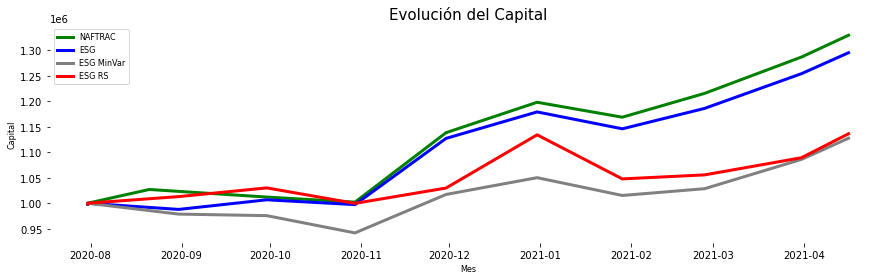

In [20]:
vz.basic_plot_x4(passive_NAFTRAC, passive_ESG, passive_ESG_new_minvar, passive_ESG_new_RS,"Evolución del Capital","Capital","Capital","Capital","Capital","Mes","Capital","NAFTRAC", "ESG", "ESG MinVar","ESG RS" )

# 5.0 Análisis Por Sector

Con el fin de comparar el comportamiento de la industria ESG, se eligieron 4 industrias donde, se conoce que tiene activos con calificaciones ESG y cotizan en alguna bolsa mexicana, es decir, en pesos mexicanos. De acuerdo a Yahoo Finance, las industrias y activos que se escogieron son:
1. Industria de telecomunicaciones:
    * TEFN
    - TMUS
    - VODN
    - VZ
    - ZM
2. Industria de materiales para la construcción:
    - CEMEXCPO
    - MLM
    - CMOCTEZ
    - GCC
3. Industria banquera
    - GFNORTEO
    - BSMXB
    - GFINBURO
    - RA
    - BBAJIOO
    - BBVA
4. Industria de tiendas de consumo
    - WALMEX
    - SORIANAB
    - LACOMERUBC

Se descargó el ultimo precio del mes, por 15 años a traves de Factset, asegurando consistencia, calidad y veracidad de la información. Posteriormente, a través del portal de Sustainalytics se recupero la calificación de los activos previamente mencionados; para efectos del análisis, los activos que no tienen calificación ESG seran considerados "no ESG", bajo el supuesto de que si no se mide el riesgo ESG, no se considera dentro.

In [21]:
#importacion de librerias. "industries" es la libreria donde se crearon las funciones para el análisis
import os
import numpy as np
import industries as ind
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
#Definicion de Parametros
start_date="2020-01-01"
end_date="2020-12-31"

path =  r'Industries_Analysis'
abspath = os.path.abspath(path)

#Cargamos Calificaciones
calificaciones = pd.read_excel(abspath+"\\ESGs Ratings.xlsx",sheet_name="sust",index_col=0)

## 5.1 Industria de las Telecomunicaciones

#### América Móvil se encuentra en la industria de las telecomunicaciones en México, siendo una empresa icónica y líder en el mercado, por lo que se escogió esta industria, con el propósito de compararla.

In [23]:
#Creación de Clase
closes = pd.read_excel(abspath+"\\TLCM.xlsx",sheet_name="SUMM",index_col=0)  
#La clase lee un archivo con los precios, donde filtra las fechas y las empresas que cuenten con información completa
telecomms = ind.stanalysis(closes, start_date, end_date)

#### Las empresas de esta industria, que cotizaron en todo el 2020 son las siguientes:

In [24]:
telecomms.empresas

['TEFN', 'TMUS', 'VODN', 'VZ', 'AMXL', 'MAXCOMA', 'AXTELCPO', 'T', 'SITESB.1']

#### En esta industria podemos observar gran variedad en metricas como el rendimiento, simple y  acumulado, simple y promedio, y el radio de Sharpe, en la siguiente gráfica se muestran los precios normalizados (a través de sklearn) para una mejor visualización del comportamiento.

<AxesSubplot:xlabel='Date'>

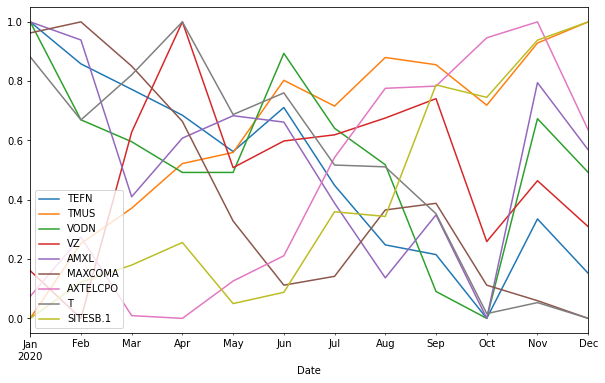

In [25]:
telecomms.graph()

In [26]:
telecomms.metrics(rf=0.0533)

,Avg Acum Ret,Rend Acum,Avg Ret,Avg Vol,Sharpe
TEFN,-3.178473,-4.7436,-0.431220,0.412634,-14.09
TMUS,5.498945,7.4808,0.680084,0.270950,27.76
VODN,-1.202182,-0.9948,-0.090455,0.272966,-6.32
VZ,1.575600,1.0308,0.093686,0.321825,1.51
AMXL,-1.001345,-0.6432,-0.058480,0.253701,-5.29
MAXCOMA,-4.619127,-8.0352,-0.730458,0.480452,-19.58
AXTELCPO,7.787455,11.5488,1.049906,0.810639,14.75
T,-1.093745,-2.5716,-0.233824,0.152991,-22.52
SITESB.1,2.709164,5.7192,0.519926,0.278996,20.07


#### Estas empresas se representan en un gráfico, teniendo el rendimiento esperado en el eje de las ordenadas y la volatilidad en el de las abscisas. Adicionalmente, los puntos han sido mapeados en una escala de color de acuerdo a su calificación ESG.

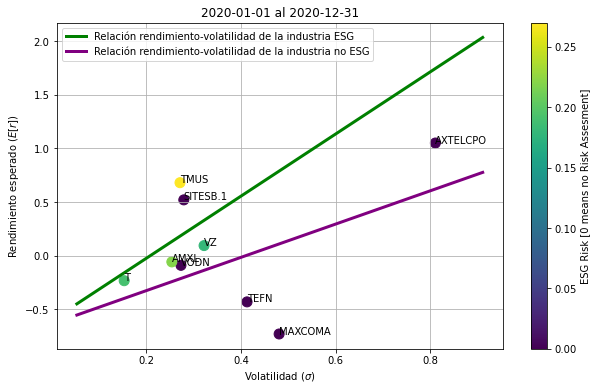

La pendiente de la industria ESG es de  2.9 mientras que para la industria no ESG es de  1.55


In [27]:
telecomms.esg_vs_noesg(calificaciones)

#### Como punto de comparación, a través de mínimos cuadrados se ajustaron dos rectas a la industria, una para las empresas "ESG" y otra para las "no ESG". Estas rectas con ecuacion  $ y=mx+b $ nos representan la relacion rendimiento-volatilidad de las industrias. La métrica relevante en este análisis es la pendiente de la recta, ya que entre mayor sea esta tendremos mas rendimiento por menos volatilidad -relativamente-.

#### Adicionalmente se utilizara el radio de sharpe como medida de desepeño, ya que es una medida del exceso de rendimiento por unidad de riesgo de una inversión;se utiliza para mostrar hasta qué punto el rendimiento de una inversión compensa al inversor por asumir riesgo en su inversión. Para fines prácticos, la tasa libre de riesgo usada es de 5.33%, producto del promedio mensual de los cetes 28 a lo largo del 2020.

#### En la industria de telecomunicaciones observamos una pendiente significativamente mayor en las empresas ESG, indicando que en la industria de telecomunicaciones, en las empresas ESG hay mas rendimiento por unidad de volatilidad que en la no ESG. Otro punto de comparación son los radios de Sharpe, con un promedio de 0.365 y -2.098 para la industria ESG y la no ESG, respectivamente. En ambos puntos, las empresas ESG de esta industria  tiene un desempeño mejor.

## 5.2 Industria de Materiales para Construcción

#### CEMEX se encuentra en la industria de materiales para la construcción, y de acuerdo a yahoo finance, solo 4 empresas de esta industria cotizaron en todo el 2020:

In [28]:
closes = pd.read_excel(abspath+"\\BUILD.xlsx",sheet_name="SUMM",index_col=0)    
building_materials = ind.stanalysis(closes, start_date, end_date)

In [29]:
building_materials.empresas

['CEMEXCPO', 'MLM', 'CMOCTEZ', 'GCC']

#### Debido a la baja cantidad de empresas, es más fácil identificar comportamientos en la industria, que se puede identificar un comportamiento con ciertas similitudes.

<AxesSubplot:xlabel='Date'>

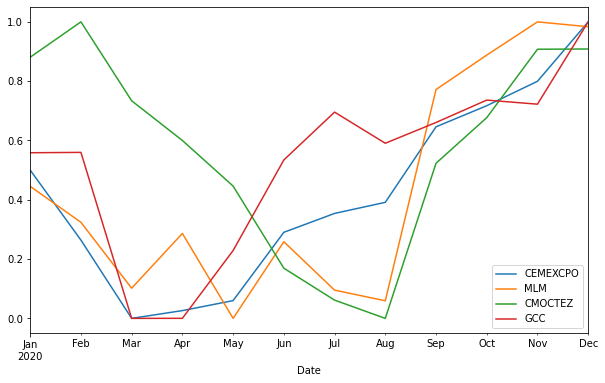

In [30]:
building_materials.graph()

#### En las métricas, observamos que nuestro activo principal, CEMEXCPO cuenta con el radio de Sharpe más alto

In [31]:
building_materials.metrics(rf=0.0533)

,Avg Acum Ret,Rend Acum,Avg Ret,Avg Vol,Sharpe
CEMEXCPO,-0.304255,4.7688,0.433533,0.463203,9.85
MLM,0.048000,1.5240,0.138595,0.218924,4.68
CMOCTEZ,-0.870655,0.2952,0.026890,0.214696,-1.48
GCC,0.426327,3.5520,0.322904,0.445279,7.27


#### A pesar de los buenos radios de sharpe de las empresas ESG en la industria en los materiales para la construcción, las pendientes de nuestras dos rectas es muy similar, inclusive, siendo la relacion rendimiento-volatilidad menor en el caso de las ESG. Sin embargo, debido a la baja cantidad de datos una recta no la consideramos conclusiva, por lo que si obtenemos el promedio del radio de Sharpe de las ESG y las no ESG, obtenemos 7.265 y 2.895 respectivamente. 

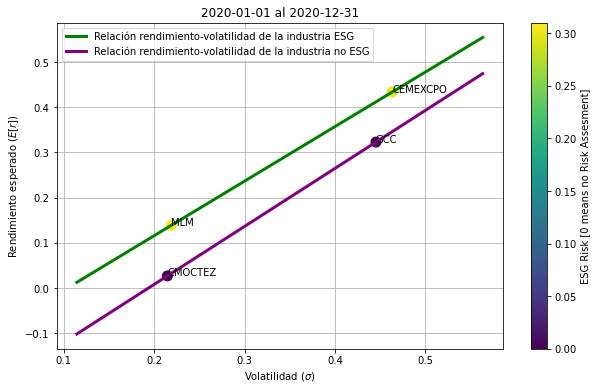

La pendiente de la industria ESG es de  1.21 mientras que para la industria no ESG es de  1.28


In [32]:
building_materials.esg_vs_noesg(calificaciones)

#### Dicho lo anterior, en esta industria tambien se muestra un mejor comportamiento de las empresas ESG.

## 5.3 Industria Banquera

#### Otra industria con empresas ESG es la Banquera, la cual es de las industrias con impacto ESG ya que van alineadas a principios internacionales y es considerada de las industrias mas adaptables al cambio. En méxico, podemos encontrar 6 bancos que cotizaron en 2020:

In [33]:
closes = pd.read_excel(abspath+"\\BANKS.xlsx",sheet_name="SUMM",index_col=0)    
banking = ind.stanalysis(closes, start_date, end_date)

In [34]:
banking.empresas

['GFNORTEO', 'BSMXB', 'GFINBURO', 'RA', 'BBAJIOO', 'BBVA']

#### En esta industria se observa un comportamiento mucho mas distinguible que en las industrias pasadas, claro efecto de la pandemia.

<AxesSubplot:xlabel='Date'>

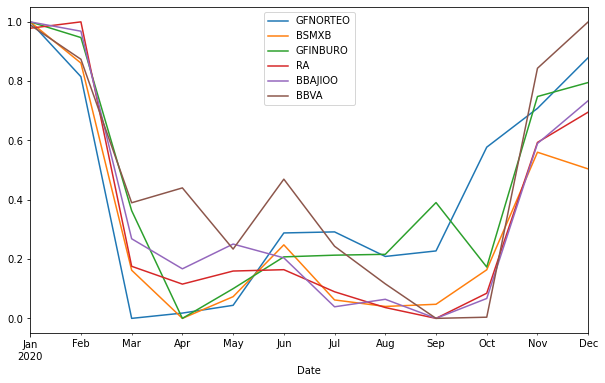

In [35]:
banking.graph()

#### A pesar del comportamiento similar de los precios, en las métricas encontramos mas variedad:

In [36]:
banking.metrics(rf=0.0533)

,Avg Acum Ret,Rend Acum,Avg Ret,Avg Vol,Sharpe
GFNORTEO,-2.712436,1.2036,0.109396,0.561855,1.20
BSMXB,-4.442400,-1.1196,-0.101807,0.655665,-2.84
GFINBURO,-2.335855,0.0300,0.002743,0.415627,-1.46
RA,-4.103564,0.9564,0.086980,0.747448,0.54
BBAJIOO,-3.904364,0.3984,0.036236,0.638504,-0.32
BBVA,-2.490436,1.8768,0.170672,0.661813,2.13


#### Mismo caso que en el sector de materiales para la construcción, la pendiente de las empresas ESG en esta industrias es menor que las no ESG, sin embargo por la cantidad de datos, esta puede ser tambien muy influenciable, ya que solo se tienen 3 puntos para cada recta. Si analizamos el promedio de los radio de Sharpe, obtenemos 0.623 y -0.873 para las empresas ESG y no ESG en esta industria respectivamente.

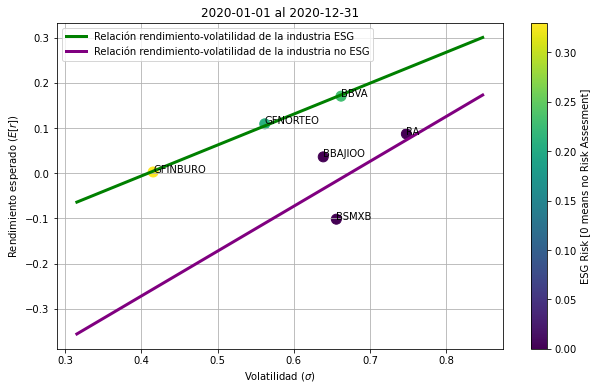

La pendiente de la industria ESG es de  0.69 mientras que para la industria no ESG es de  1.0


In [37]:
banking.esg_vs_noesg(calificaciones)

#### Por tercera vez, en la industria banquera tambien se muestra un mejor comportamiento de las empresas ESG en la industria.

## 5.4 Sector Retail consumo

#### Walmart de méxico se encuentra en el sector del retail para consumo en México, y de acuerdo a Yahoo Finance, las empresas listadas bursatiles en pesos mexicanos, que cotizan en las fechas de la muestra son, como en el caso de la industria de materiales para la contrucción son solo 4:

In [38]:
closes = pd.read_excel(abspath+"\\CONSUMO.xlsx",sheet_name="SUMM",index_col=0)    
consuming = ind.stanalysis(closes, start_date, end_date)

In [39]:
consuming.empresas

['WALMEX', 'SORIANAB', 'LACOMERUBC', 'COST']

#### A pesar de que son pocas empresas, no se observa un comportamiento similar en la industria

<AxesSubplot:xlabel='Date'>

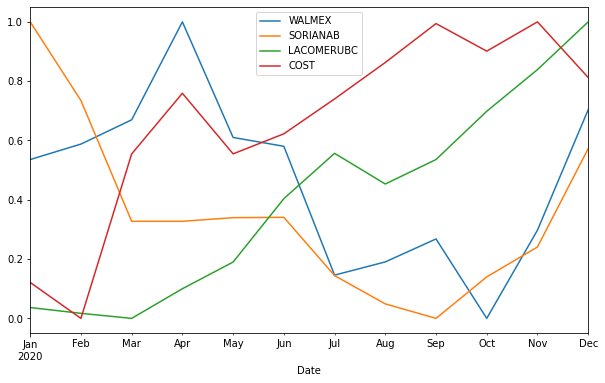

In [40]:
consuming.graph()

#### Tampoco se observan metricas similares:

In [41]:
consuming.metrics(rf=0.0533)

,Avg Acum Ret,Rend Acum,Avg Ret,Avg Vol,Sharpe
WALMEX,-0.087709,0.3168,0.028816,0.119774,-2.45
SORIANAB,-3.465818,-1.5348,-0.139549,0.331672,-6.98
LACOMERUBC,3.803455,8.2656,0.751443,0.240717,34.80
COST,2.959309,3.5100,0.319059,0.301418,10.58


#### El promedio del radio de Sharpe es de 4.065 y 13.91, para las empresas ESG y las no ESG de esta industria, respectivamente; por lo que en esta industria a diferencia de las otras, las ESG no muestran un mejor comportamiento, sin embargo, en cuestion a la relaicon rendimiento-volatilidad, es positiva y negativa para las empresas ESG y las no ESG, respectivamente. Esta recta, enfatizamos que al ser pocos puntos, es muy influenciable por cambios minimos.

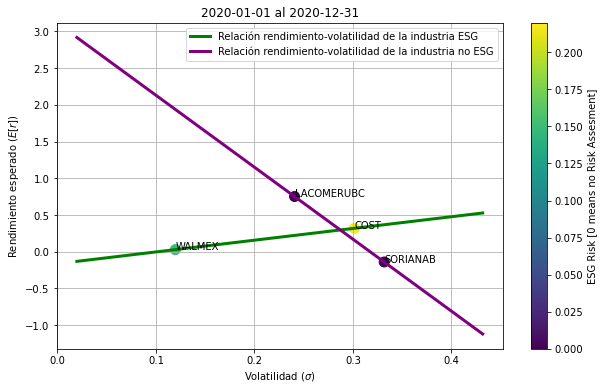

La pendiente de la industria ESG es de  1.6 mientras que para la industria no ESG es de  -9.8


In [42]:
consuming.esg_vs_noesg(calificaciones)

#### Esta industria refleja un comportamiento diferente a las anteriores, donde el promedio de los radio de sharpe es mayor en las empresasESG, puediendo ser efecto de la pandemia, ya que si observamos en el periodo del 2019, el promedio de los ratios de sharpe fueron 11.28 y 3.935, para las empresas ESG y las no ESG en la industria, respectivamente.

In [43]:
consuming = ind.stanalysis(closes, "01/01/2019", "31/12/2019")
consuming.metrics(rf=0.0533)

,Avg Acum Ret,Rend Acum,Avg Ret,Avg Vol,Sharpe
WALMEX,1.120364,1.0296,0.093593,0.154250,3.13
SORIANAB,-1.389709,-0.2496,-0.022698,0.301113,-3.03
LACOMERUBC,1.953273,2.2416,0.203751,0.165593,10.90
COST,3.183600,4.0260,0.365979,0.193090,19.43


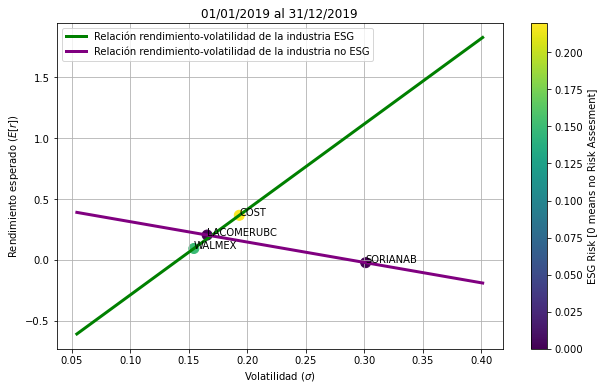

La pendiente de la industria ESG es de  7.01 mientras que para la industria no ESG es de  -1.67


In [44]:
consuming.esg_vs_noesg(calificaciones)

## 5.5 4 Conclusón Análisis por Industria

#### Encontramos resultados diferentes a través de las 4 industrias, donde en cuestión de la métrica de la pendiente de la recta, fue 50-50, mientras que en la métrica de Sharpe fue de 75-25. 

|                    | Pendiente | Sharpe |
|--------------------|-----------|--------|
| Telecomunicaciones | ESG       | ESG    |
| Construcción       | No ESG    | ESG    |
| Bancos             | No ESG    | ESG    |
| Retail            | ESG       | No ESG |

In [45]:
closes = pd.read_excel(abspath+"\\Todos.xlsx",sheet_name="SUMM",index_col=0)    
todos = ind.stanalysis(closes, start_date, end_date)

#### Estos resultados mixtos nos llevan a realizar un último experimento. Sin discriminar por industria, pero mantreniendo las empresas de estas previas analizadas. Un inconveniente del mercado mexicano es la limitación en la segmentación, ya que la cantidad de empresas es bastante pequeña, no se puede observar un resultado consciso. Es por esto, que en vez de estudiar industria por industria, analizaremos a las 4 como una sola, destacando que entre una y otra no hay relación o similitud. Estas son las empresas listadas:

In [46]:
todos.empresas

['WALMEX',
 'SORIANAB',
 'LACOMERUBC',
 'COST',
 'GFNORTEO',
 'BSMXB',
 'GFINBURO',
 'RA',
 'BBAJIOO',
 'BBVA',
 'CEMEXCPO',
 'MLM',
 'CMOCTEZ',
 'GCC',
 'TEFN',
 'TMUS',
 'VODN',
 'VZ',
 'AMXL',
 'MAXCOMA',
 'AXTELCPO',
 'T',
 'SITESB.1']

#### Como esperabamos, no es posible identificar algun patrón entre los compartamientos de los precios

<AxesSubplot:xlabel='Date'>

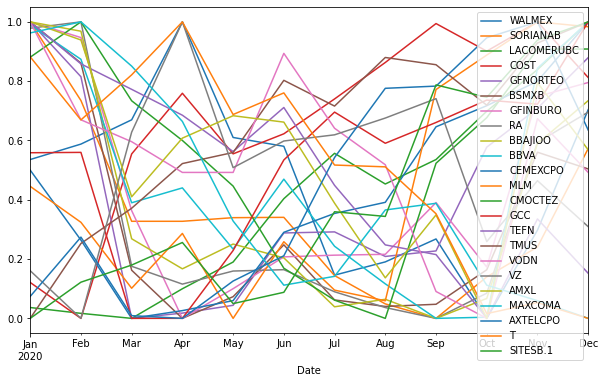

In [47]:
todos.graph()

In [48]:
todos.metrics(rf=0.0533)

,Avg Acum Ret,Rend Acum,Avg Ret,Avg Vol,Sharpe
WALMEX,-0.087709,0.3168,0.028816,0.119774,-2.45
SORIANAB,-3.465818,-1.5348,-0.139549,0.331672,-6.98
LACOMERUBC,3.803455,8.2656,0.751443,0.240717,34.80
COST,2.959309,3.5100,0.319059,0.301418,10.58
GFNORTEO,-2.712436,1.2036,0.109396,0.561855,1.20
BSMXB,-4.442400,-1.1196,-0.101807,0.655665,-2.84
GFINBURO,-2.335855,0.0300,0.002743,0.415627,-1.46
RA,-4.103564,0.9564,0.086980,0.747448,0.54
BBAJIOO,-3.904364,0.3984,0.036236,0.638504,-0.32
BBVA,-2.490436,1.8768,0.170672,0.661813,2.13


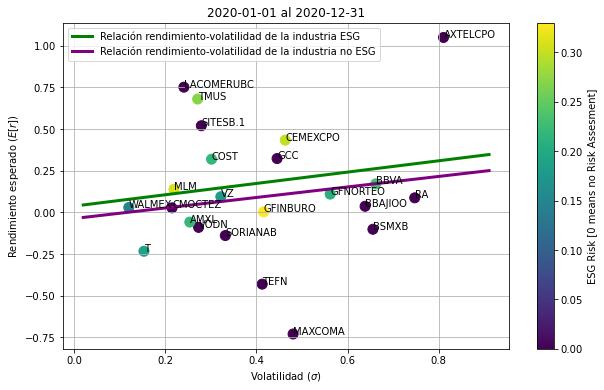

La pendiente de la industria ESG es de  0.34 mientras que para la industria no ESG es de  0.32


In [49]:
todos.esg_vs_noesg(calificaciones)

#### En ambas métricas, obtenemos un mejor comportamiento en las empresas ESG, ya que tenemos una pendiente mayor en la linea de relación de rendimiento-volatilidad, con 0.34 y 0.32 respectivamente. Adicional a esto, el promedio del radio de sharpe de las empresas ESG fue mayor en el periodo, con 2.36 y 1.71 para las no ESG. Por lo que podemos concluir que la industria ESG tiene un mejor desempeño a sus rendimeintos ajustados al riesgo, no de manera absoluta, pero si relativa contra la industria no ESG.

# 6.0 Portafolios Eficientes en Media Varianza (EMV)
Primero que nada, es importante definir algunos conceptos:

**¿Qué es un portafolio?**
- Es el conjunto (colección) de diferentes activos. 

**¿Qué es la línea de asignación de capital (LAC)?**
- La representación gráfica de todas las posibles combinaciones de un portafolio compuesto por un activo libre de riesgo y un activo riesgoso. Su pendiente es el radio de Sharpe.

**¿Qué es el Radio de Sharpe?**
- Es una medida del exceso de rendimiento por unidad de riesgo de una inversión;se utiliza para mostrar hasta qué punto el rendimiento de una inversión compensa al inversor por asumir riesgo en su inversión.

**¿Qué es un índice?**
- Conjunto ("bolsa") de acciones que proporciona una amplia muestra de una industria, sector o economía nacional.

Como se sabe, existen activos riesgosos que poseen un comportamiento aleatorio pero que a su vez son compensados con el rendimiento que estos puedan llegar a generar, una situación muy similar a la frase “No pain, no gain”.

 A través de la teoría de selección de portafolios realizada por Markowitz la cual nos da a concer que tanto riesgo es necesario correr y cual es la forma de minimizar el riesgo mientras se maximizan las gancias; se buscó la mejor asignación de pesos para formar los siguientes portafolios que maximizan el Radio de Sharpe.


Partimos de la ecuación de la Linea de Asignación de Capital donde:

- $r_s$ el rendimiento del activo riesgoso,
- $r_f$ el rendimiento libre de riesgo, y
- $w$ la fracción invertida en el activo riesgoso.
$$E[r_p]=r_f+\frac{E[r_s-r_f]}{\sigma_s}\sigma_p.$$

Para obtener los mejores pesos, es necesario encontra la curva de indiferancia(lugar geométricos en el espacio de rendimiento esperado vs. volatilidad) más alto posible. 

$$\max_{w} \quad r_f+wE[r_s-r_f]-\frac{1}{2}\gamma w^2\sigma_s^2.$$

Por lo que se busca encontrar la $w$ que maximiza la anterior expresión obteniendo lo siguiente como solución:

$$w^\ast=\frac{E[r_s-r_f]}{\gamma\sigma_s^2}.$$


Por lo tanto, el mejor portafolio es aquel que maximiza el radio de Sharpe el cual se le conoce como el portafolio eficiente en media-varianza (EMV)

In [50]:
import EMV_funcs as EMV
path =  r'EMV'
abspath = os.path.abspath(path)

### A continuación se presenta el análisis de portafolios EMV con activos ESG y No ESG.
Simulamos un portafolio de 5 activos No ESG como los son Vodafone,Soriana,La Comer,Cemento Moctezuma,Banco Bajio en el que se buscó los mejores pesos para ver su desempeño. 

In [51]:
rf=0.0407
start_date='2019-03-31'
end_date='2020-03-31'
start_date2='2020-03-31'
end_date2='2021-03-31'

In [52]:
#DATOS NO ESG 
t_nesg=pd.read_csv(abspath+'\\5NOASG.csv',index_col=[0])
closes_nesg1=EMV.get_data(t_nesg,start_date,end_date) #Precios diarios
ret_nesg1=closes_nesg1.pct_change().dropna()
ret_nesg1.head(2) #rendimientos diarios

Symbols,VODN.MX,LACOMERUBC.MX,BBAJIOO.MX,SORIANAB.MX,CMOCTEZ.MX
Date,,,,,
2019-04-02,0.0,0.0,-0.002344,0.008881,0.002009
2019-04-03,0.0,0.0,0.007311,-0.000440,-0.012696


In [53]:
#Tabla de Rendimiento y Volatilidades Anuales
ret_summ_nesg1=EMV.ret_summary(ret_nesg1)
ret_summ_nesg1.head(2)

,Rend_Anual,Vol_Anual
Symbols,,
VODN.MX,0.007874,0.327652
LACOMERUBC.MX,0.149159,0.357872


In [54]:
#Calculos intermedios
Eind_nesg1=EMV.par(ret_summ_nesg1,ret_nesg1)[2] #rendimientos esperados activos individuales
Sigma_nesg1=EMV.par(ret_summ_nesg1,ret_nesg1)[1] #matriz de varianza-covarianza

w_minvar_nesg1=EMV.data_pmv(Eind_nesg1,Sigma_nesg1)[0] #pesos portafolio minima varianza
E_minvar_nesg1=EMV.data_pmv(Eind_nesg1,Sigma_nesg1)[1] #Rendimiento portafolio minima varianza
s_minvar_nesg1=EMV.data_pmv(Eind_nesg1,Sigma_nesg1)[2] #Volatilidad portafolio minima varianza
#w_minvar_nesg1,E_minvar_nesg1,s_minvar_nesg1

w_EMV_nesg1 = EMV.portEMV(EMV.minus_SR,Eind_nesg1,Sigma_nesg1)[0]#pesos portafolio EMV
E_EMV_nesg1 = EMV.portEMV(EMV.minus_SR,Eind_nesg1,Sigma_nesg1)[1]#Rendimiento portafolio EMV
s_EMV_nesg1 = EMV.portEMV(EMV.minus_SR,Eind_nesg1,Sigma_nesg1)[2]#Volatilidad portafolio EMV

w_EMV_nesg1,E_EMV_nesg1,s_EMV_nesg1

(array([0.001, 0.996, 0.001, 0.001, 0.001]),
 0.14790132992481964,
 0.3566677821012287)

In [55]:
RS_EMV_nesg1=EMV.RS_EMV(rf,E_EMV_nesg1,s_EMV_nesg1) #Radio de Sharpe
RS_EMV_nesg1

0.30056353644634487

<module 'matplotlib.pyplot' from 'C:\\Users\\DParis\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

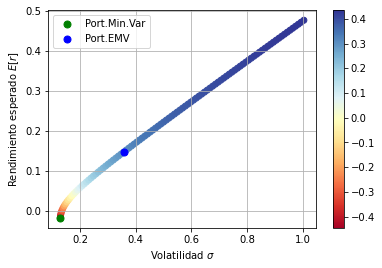

In [56]:
EMV.plot_portas(w_EMV_nesg1,Sigma_nesg1,w_minvar_nesg1,s_EMV_nesg1,s_minvar_nesg1,E_EMV_nesg1,E_minvar_nesg1)

**Ahora con datos del 2020-2021**

In [57]:
closes_nesg2=EMV.get_data(t_nesg,start_date2,end_date2) #Precios diarios
ret_nesg2=closes_nesg2.pct_change().dropna()
#ret_nesg1.head(2) #rendimientos diarios
#Tabla de Rendimiento y Volatilidades Anuales
ret_summ_nesg2=EMV.ret_summary(ret_nesg2)
ret_summ_nesg2.head(2)

,Rend_Anual,Vol_Anual
Symbols,,
VODN.MX,0.155331,0.294512
LACOMERUBC.MX,0.647299,0.300965


In [58]:
#Calculos intermedios
Eind_nesg2=EMV.par(ret_summ_nesg2,ret_nesg2)[2] #rendimientos esperados activos individuales
Sigma_nesg2=EMV.par(ret_summ_nesg2,ret_nesg2)[1] #matriz de varianza-covarianza

w_minvar_nesg2=EMV.data_pmv(Eind_nesg2,Sigma_nesg2)[0] #pesos portafolio minima varianza
E_minvar_nesg2=EMV.data_pmv(Eind_nesg2,Sigma_nesg2)[1] #Rendimiento portafolio minima varianza
s_minvar_nesg2=EMV.data_pmv(Eind_nesg2,Sigma_nesg2)[2] #Volatilidad portafolio minima varianza
#w_minvar_nesg2,E_minvar_nesg2,s_minvar_nesg2

w_EMV_nesg2 = EMV.portEMV(EMV.minus_SR,Eind_nesg2,Sigma_nesg2)[0]#pesos portafolio EMV
E_EMV_nesg2 = EMV.portEMV(EMV.minus_SR,Eind_nesg2,Sigma_nesg2)[1]#Rendimiento portafolio EMV
s_EMV_nesg2 = EMV.portEMV(EMV.minus_SR,Eind_nesg2,Sigma_nesg2)[2]#Volatilidad portafolio EMV

w_EMV_nesg2,E_EMV_nesg2,s_EMV_nesg2

(array([0.07010139, 0.42987578, 0.06850739, 0.001     , 0.43051545]),
 0.4075481427130018,
 0.15799318116629826)

In [59]:
RS_EMV_nesg2=EMV.RS_EMV(rf,E_EMV_nesg2,s_EMV_nesg2) #Radio de Sharpe
RS_EMV_nesg2

2.3219238957336388

<module 'matplotlib.pyplot' from 'C:\\Users\\DParis\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

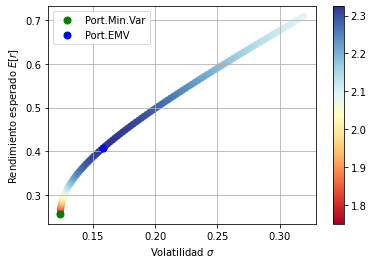

In [60]:
EMV.plot_portas(w_EMV_nesg2,Sigma_nesg2,w_minvar_nesg2,s_EMV_nesg2,s_minvar_nesg2,E_EMV_nesg2,E_minvar_nesg2)

####  Ahora realizamos el mismo procedimiento pero para un portafolio compuesto por 5 empresas que son ESG:

- América Móvil,Grupo México,FEMSA,Banorte y Walmart

In [61]:
#DATOS ESG 
t_esg=pd.read_csv(abspath+'\\5ASG.csv',index_col=[0])
closes_esg1=EMV.get_data(t_esg,start_date,end_date) #Precios diarios
ret_esg1=closes_esg1.pct_change().dropna()
ret_esg1.head(2) #rendimientos diarios

Symbols,AMXL.MX,WALMEX.MX,GMEXICOB.MX,GFNORTEO.MX,FEMSAUBD.MX
Date,,,,,
2019-04-02,-0.024770,-0.012779,-0.004206,0.012241,-0.008121
2019-04-03,0.002903,0.001932,-0.030854,0.013488,0.000449


In [62]:
#Tabla de Rendimiento y Volatilidades Anuales
ret_summ_esg1=EMV.ret_summary(ret_esg1)
ret_summ_esg1.head(2)

,Rend_Anual,Vol_Anual
Symbols,,
AMXL.MX,0.058234,0.282196
WALMEX.MX,0.112390,0.262512


In [63]:
#Calculos intermedios
Eind_esg1=EMV.par(ret_summ_esg1,ret_esg1)[2] #rendimientos esperados activos individuales
Sigma_esg1=EMV.par(ret_summ_esg1,ret_esg1)[1] #matriz de varianza-covarianza

w_minvar_esg1=EMV.data_pmv(Eind_esg1,Sigma_esg1)[0] #pesos portafolio minima varianza
E_minvar_esg1=EMV.data_pmv(Eind_esg1,Sigma_esg1)[1] #Rendimiento portafolio minima varianza
s_minvar_esg1=EMV.data_pmv(Eind_esg1,Sigma_esg1)[2] #Volatilidad portafolio minima varianza
#w_minvar_esg1,E_minvar_esg1,s_minvar_esg1

w_EMV_esg1 = EMV.portEMV(EMV.minus_SR,Eind_esg1,Sigma_esg1)[0]#pesos portafolio EMV
E_EMV_esg1 = EMV.portEMV(EMV.minus_SR,Eind_esg1,Sigma_esg1)[1]#Rendimiento portafolio EMV
s_EMV_esg1 = EMV.portEMV(EMV.minus_SR,Eind_esg1,Sigma_esg1)[2]#Volatilidad portafolio EMV

w_EMV_esg1,E_EMV_esg1,s_EMV_esg1

(array([0.001, 0.996, 0.001, 0.001, 0.001]),
 0.11136632465103107,
 0.2619162955535853)

In [64]:
RS_EMV_esg1=EMV.RS_EMV(rf,E_EMV_esg1,s_EMV_esg1) #Radio de Sharpe
RS_EMV_esg1

0.2698049943844501

<module 'matplotlib.pyplot' from 'C:\\Users\\DParis\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

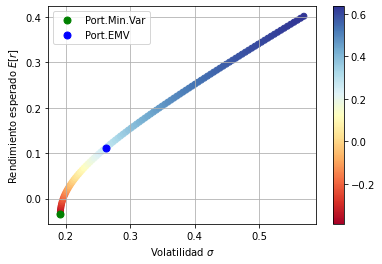

In [65]:
EMV.plot_portas(w_EMV_esg1,Sigma_esg1,w_minvar_esg1,s_EMV_esg1,s_minvar_esg1,E_EMV_esg1,E_minvar_esg1)

**Ahora con datos del 2020-2021**

In [66]:
closes_esg2=EMV.get_data(t_esg,start_date2,end_date2) #Precios diarios
ret_esg2=closes_esg2.pct_change().dropna()
#ret_nesg1.head(2) #rendimientos diarios
#Tabla de Rendimiento y Volatilidades Anuales
ret_summ_esg2=EMV.ret_summary(ret_esg2)
ret_summ_esg2.head(2)

,Rend_Anual,Vol_Anual
Symbols,,
AMXL.MX,0.075249,0.280933
WALMEX.MX,0.209860,0.293073


In [67]:
#Calculos intermedios
Eind_esg2=EMV.par(ret_summ_esg2,ret_esg2)[2] #rendimientos esperados activos individuales
Sigma_esg2=EMV.par(ret_summ_esg2,ret_esg2)[1] #matriz de varianza-covarianza

w_minvar_esg2=EMV.data_pmv(Eind_esg2,Sigma_esg2)[0] #pesos portafolio minima varianza
E_minvar_esg2=EMV.data_pmv(Eind_esg2,Sigma_esg2)[1] #Rendimiento portafolio minima varianza
s_minvar_esg2=EMV.data_pmv(Eind_esg2,Sigma_esg2)[2] #Volatilidad portafolio minima varianza
#w_minvar_esg2,E_minvar_esg2,s_minvar_esg2

w_EMV_esg2 = EMV.portEMV(EMV.minus_SR,Eind_esg2,Sigma_esg2)[0]#pesos portafolio EMV
E_EMV_esg2 = EMV.portEMV(EMV.minus_SR,Eind_esg2,Sigma_esg2)[1]#Rendimiento portafolio EMV
s_EMV_esg2 = EMV.portEMV(EMV.minus_SR,Eind_esg2,Sigma_esg2)[2]#Volatilidad portafolio EMV

w_EMV_esg2,E_EMV_esg2,s_EMV_esg2

(array([0.001     , 0.001     , 0.83003578, 0.16696422, 0.001     ]),
 0.961809096985519,
 0.34673102547574264)

In [68]:
RS_EMV_esg2=EMV.RS_EMV(rf,E_EMV_esg2,s_EMV_esg2) #Radio de Sharpe
RS_EMV_esg2

2.6565522820511487

<module 'matplotlib.pyplot' from 'C:\\Users\\DParis\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

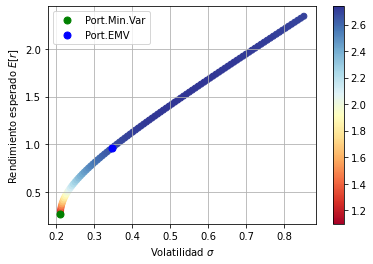

In [69]:
EMV.plot_portas(w_EMV_nesg2,Sigma_esg2,w_minvar_esg2,s_EMV_esg2,s_minvar_esg2,E_EMV_esg2,E_minvar_esg2)

### A continuación se muestra una tabla resumida del análisis anterior


In [70]:
tcomp=pd.DataFrame(columns=['ESG 2019-2020',' No ESG 2019-2020','ESG 2020-2021','No ESG 2020-2021'],
                   index=['Rendimientos (%)', 'Volatilidad (%)','Radio Sharpe'])
tcomp.loc['Rendimientos (%)'] = np.array([E_EMV_esg1*100,E_EMV_nesg1*100,E_EMV_esg2*100,E_EMV_nesg2*100])
tcomp.loc['Volatilidad (%)'] = np.array([s_EMV_esg1*100,s_EMV_nesg1*100,s_EMV_esg2*100,s_EMV_nesg2*100])
tcomp.loc['Radio Sharpe'] = np.array([RS_EMV_esg1,RS_EMV_nesg1,RS_EMV_esg2,RS_EMV_nesg2])
tcomp

,ESG 2019-2020,No ESG 2019-2020,ESG 2020-2021,No ESG 2020-2021
Rendimientos (%),11.136632,14.790133,96.18091,40.754814
Volatilidad (%),26.19163,35.666778,34.673103,15.799318
Radio Sharpe,0.269805,0.300564,2.656552,2.321924


## Reconociendo ESG

Con ayuda de un método de calificación basado en las top 5 ponderaciones de las acciones consideras en el ETF de iShares ESG MSCI Mexico de Black Rock, se estableció un rango de pesos para estas 5 acciones:

- América Móvil,Grupo México,FEMSA,Banorte y Walmart

Primero obtenemos los precios ajustados de activos que se encuentran en el índice del NAFTRAC (índice que busca reproducir el comportamiento del Índice de Precios y Cotizaciones de la Bolsa Mexicana de Valores) el cual cuanta con empresas ESG y No ESG con el periodo de análisis del 31-03-2020 al 31-03-2021, cabe destacar que es un periodo de alta incertidumbre debido a la pandemia.

Posteriormente se presenta una comparación del desempeño de un portafolio creado sin incorporar la calificación ASG vs uno que si la contempla.


In [71]:
t_comb=pd.read_csv(abspath+'\\TNAFTRAC.csv',index_col=[0])
closes_comb=EMV.get_data(t_comb,start_date2,end_date2) #Precios diarios
ret_comb=closes_comb.pct_change().dropna()
ret_comb.head(2) #rendimientos diarios

Symbols,AMXL.MX,WALMEX.MX,GMEXICOB.MX,GFNORTEO.MX,FEMSAUBD.MX,CEMEXCPO.MX,TLEVISACPO.MX,ELEKTRA.MX,GAPB.MX,ASURB.MX,...,GCC.MX,BBAJIOO.MX,VESTA.MX,BOLSAA.MX,Q.MX,SITESB-1.MX,ALSEA.MX,LIVEPOLC-1.MX,LABB.MX,RA.MX
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,-0.014947,0.006278,-0.063329,-0.067692,-0.002793,-0.068965,-0.046886,-0.004067,-0.063349,-0.023952,...,-0.029593,-0.058594,-0.012395,-0.079470,-0.008699,-0.019646,0.001317,-0.033997,0.015368,-0.107697
2020-04-02,0.002168,-0.011765,-0.018062,0.031683,-0.006092,-0.028322,-0.031130,-0.008768,0.014834,-0.000321,...,-0.025928,-0.012967,0.044297,0.013489,0.036258,-0.062124,-0.019737,0.006799,-0.060543,0.026004


In [72]:
#Tabla de Rendimiento y Volatilidades Anuales
ret_summ_comb=EMV.ret_summary(ret_comb)
ret_summ_comb.head(2)

,Rend_Anual,Vol_Anual
Symbols,,
AMXL.MX,0.075249,0.280933
WALMEX.MX,0.209860,0.293073


In [73]:
#Calculos intermedios
Eind_comb=EMV.par(ret_summ_comb,ret_comb)[2] #rendimientos esperados activos individuales
Sigma_comb=EMV.par(ret_summ_comb,ret_comb)[1] #matriz de varianza-covarianza

w_minvar_comb=EMV.data_pmv(Eind_comb,Sigma_comb)[0] #pesos portafolio minima varianza
E_minvar_comb=EMV.data_pmv(Eind_comb,Sigma_comb)[1] #Rendimiento portafolio minima varianza
s_minvar_comb=EMV.data_pmv(Eind_comb,Sigma_comb)[2] #Volatilidad portafolio minima varianza
#w_minvar_comb,E_minvar_comb,s_minvar_comb

w_EMV_comb = EMV.portEMV(EMV.minus_SR,Eind_comb,Sigma_comb)[0]#pesos portafolio EMV
E_EMV_comb =EMV.portEMV(EMV.minus_SR,Eind_comb,Sigma_comb)[1]#Rendimiento portafolio EMV
s_EMV_comb =EMV.portEMV(EMV.minus_SR,Eind_comb,Sigma_comb)[2]#Volatilidad portafolio EMV

w_EMV_comb,E_EMV_comb,s_EMV_comb

(array([0.001     , 0.001     , 0.17375903, 0.001     , 0.001     ,
        0.08771427, 0.001     , 0.001     , 0.001     , 0.001     ,
        0.001     , 0.05211534, 0.001     , 0.001     , 0.001     ,
        0.07994969, 0.001     , 0.001     , 0.02126102, 0.001     ,
        0.0174251 , 0.001     , 0.001     , 0.06894897, 0.001     ,
        0.23889513, 0.001     , 0.04830217, 0.001     , 0.12587845,
        0.001     , 0.06175084, 0.001     , 0.001     , 0.001     ]),
 0.77594137636729,
 0.19373599402223496)

In [74]:
RS_EMV_comb=EMV.RS_EMV(rf,E_EMV_comb,s_EMV_comb) #Radio de Sharpe
RS_EMV_comb

3.795068542002096

### Ahora con la calificación ESG

In [75]:
closes_comb2=EMV.get_data(t_comb,start_date2,end_date2) #Precios diarios
ret_comb2=closes_comb2.pct_change().dropna()
ret_comb2.head(2) #rendimientos diarios

Symbols,AMXL.MX,WALMEX.MX,GMEXICOB.MX,GFNORTEO.MX,FEMSAUBD.MX,CEMEXCPO.MX,TLEVISACPO.MX,ELEKTRA.MX,GAPB.MX,ASURB.MX,...,GCC.MX,BBAJIOO.MX,VESTA.MX,BOLSAA.MX,Q.MX,SITESB-1.MX,ALSEA.MX,LIVEPOLC-1.MX,LABB.MX,RA.MX
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,-0.014947,0.006278,-0.063329,-0.067692,-0.002793,-0.068965,-0.046886,-0.004067,-0.063349,-0.023952,...,-0.029593,-0.058594,-0.012395,-0.079470,-0.008699,-0.019646,0.001317,-0.033997,0.015368,-0.107697
2020-04-02,0.002168,-0.011765,-0.018062,0.031683,-0.006092,-0.028322,-0.031130,-0.008768,0.014834,-0.000321,...,-0.025928,-0.012967,0.044297,0.013489,0.036258,-0.062124,-0.019737,0.006799,-0.060543,0.026004


In [76]:
#Tabla de Rendimiento y Volatilidades Anuales
ret_summ_comb2=EMV.ret_summary(ret_comb2)
ret_summ_comb2.head(2)

,Rend_Anual,Vol_Anual
Symbols,,
AMXL.MX,0.075249,0.280933
WALMEX.MX,0.209860,0.293073


In [77]:
#Calculos intermedios
Eind_comb2=EMV.par(ret_summ_comb2,ret_comb2)[2] #rendimientos esperados activos individuales
Sigma_comb2=EMV.par(ret_summ_comb2,ret_comb2)[1] #matriz de varianza-covarianza

w_minvar_comb2=EMV.data_pmv(Eind_comb2,Sigma_comb2)[0] #pesos portafolio minima varianza
E_minvar_comb2=EMV.data_pmv(Eind_comb2,Sigma_comb2)[1] #Rendimiento portafolio minima varianza
s_minvar_comb2=EMV.data_pmv(Eind_comb2,Sigma_comb2)[2] #Volatilidad portafolio minima varianza
#w_minvar_comb2,E_minvar_comb2,s_minvar_comb2

w_EMV_comb2 = EMV.portEMVpond(EMV.minus_SR,Eind_comb2,Sigma_comb2)[0]#pesos portafolio EMV
E_EMV_comb2 =EMV.portEMVpond(EMV.minus_SR,Eind_comb2,Sigma_comb2)[1]#Rendimiento portafolio EMV
s_EMV_comb2 =EMV.portEMVpond(EMV.minus_SR,Eind_comb2,Sigma_comb2)[2]#Volatilidad portafolio EMV

w_EMV_comb2,E_EMV_comb2,s_EMV_comb2

(array([1.38486542e-15, 1.14493357e-15, 1.75554840e-01, 7.50808965e-16,
        8.17346221e-16, 8.96002375e-02, 2.56527989e-15, 1.47817722e-15,
        7.93202549e-16, 2.32787460e-15, 5.68977067e-16, 5.40800016e-02,
        1.09057504e-15, 1.01957600e-15, 1.20924725e-15, 8.31391218e-02,
        1.10413675e-15, 1.23743937e-15, 2.23649122e-02, 6.27888223e-16,
        1.79692767e-02, 2.34452149e-15, 1.01992320e-15, 7.13807091e-02,
        9.02253323e-16, 2.42582964e-01, 9.25738259e-16, 5.30408968e-02,
        9.26565278e-16, 1.26986329e-01, 1.42609016e-15, 6.33007111e-02,
        8.02585813e-16, 2.39945736e-15, 6.10529088e-16]),
 0.7857906394687397,
 0.1944572343353495)

In [78]:
RS_EMV_comb2=EMV.RS_EMV(rf,E_EMV_comb2,s_EMV_comb2) #Radio de Sharpe
RS_EMV_comb2

3.831642684909322

### TABLA RESUMEN PORTAFOLIOS CON Y SIN CALIFICACIÓN ESG

In [79]:
tcomp=pd.DataFrame(columns=['Sin puntuación 2019-2020',' Con puntiación 2019-2020',],
                   index=['Rendimientos (%)', 'Volatilidad (%)','Radio Sharpe'])
tcomp.loc['Rendimientos (%)'] = np.array([E_EMV_comb*100,E_EMV_comb2*100])
tcomp.loc['Volatilidad (%)'] = np.array([s_EMV_comb*100,s_EMV_comb2*100])
tcomp.loc['Radio Sharpe'] = np.array([RS_EMV_comb,RS_EMV_comb2])
tcomp

,Sin puntuación 2019-2020,Con puntiación 2019-2020
Rendimientos (%),77.594138,78.579064
Volatilidad (%),19.373599,19.445723
Radio Sharpe,3.795069,3.831643


# CONCLUSIÓN ANÁLISIS PORTAFOLIOS ESG EMV
Con los resultados obtenidos anteriormente podemos concluir que ser una empresa ESG no necesariamente indica mejores rendimientos, lo que si podemos decir es que los portafolios que contemplan los aspectos ESG tuvieron una mejor estabilidad (menor volatilidad) por lo tanto tienden a ser más seguras incluso cuando el mercado no se encuentra en condiciones normales.